In [40]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pytz
import numpy as np
from matplotlib.patches import Rectangle
from IPython.display import display

group1 = [10,11,12,13]
group2 = [15,16,17,18]
group3 = [19,20,21]
group4 = [24,25,28,29]
allGroups = group1+group2+group3+group4

bookings = pd.read_json("../ec_data/all_bookings27-7-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

# switch to a faster method of parsing datetime strings by inferring the format
bookings['start'] = pd.to_datetime(bookings['start'],infer_datetime_format=True).dt.floor('S')
bookings['created_at'] = pd.to_datetime(bookings['created_at'],infer_datetime_format=True).dt.floor('S')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'],infer_datetime_format=True).dt.floor('S')

coordinationStartDate = datetime.datetime(2023,4,21,0,0,0,0,tzinfo=pytz.timezone('UTC'))
validBookings = bookings.loc[bookings['start']>= coordinationStartDate] 

allBookings = validBookings.loc[validBookings['user'].isin(allGroups)].copy()  

allBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00
35,2023-04-21 17:00:00+00:00,1800,oven (the oven is on and also the computer and...,,no,0.78,11,electricity_consumption,12,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00
36,2023-04-22 14:00:00+00:00,3600,dishwasher,this may not be necessary depends on how full...,yes,0.12,11,electricity_consumption,12,2023-04-21 08:47:31+00:00,2023-04-21 08:47:31+00:00
37,2023-04-21 13:00:00+00:00,5400,oven (Cooking supper for tonight but using the...,Booked when oven was already on as Sarah forg...,no,1.05,8,electricity_consumption,10,2023-04-21 12:06:09+00:00,2023-04-21 12:06:09+00:00
38,2023-04-21 15:00:00+00:00,3600,washing_and_drying (Dryer still running as wel...,More weekend preparation!,no,0.50,8,electricity_consumption,10,2023-04-21 14:54:01+00:00,2023-04-21 14:54:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...
322,2023-07-27 13:00:00+00:00,1800,oven (30min),,yes,0.40,16,electricity_consumption,28,2023-07-24 12:54:19+00:00,2023-07-24 12:54:19+00:00
323,2023-07-24 17:00:00+00:00,3600,oven (60min),,yes,0.20,8,electricity_consumption,25,2023-07-24 14:29:42+00:00,2023-07-24 14:29:42+00:00
324,2023-07-25 09:30:00+00:00,5400,Other,Cooking (hob). I don't know how many kWh this ...,yes,1.00,2,electricity_consumption,24,2023-07-25 06:33:11+00:00,2023-07-25 06:33:11+00:00
325,2023-07-25 17:00:00+00:00,1800,oven (30min),,yes,0.08,8,electricity_consumption,25,2023-07-25 08:34:41+00:00,2023-07-25 08:34:41+00:00


266 bookings were made in total.
42 of those bookings were modified.


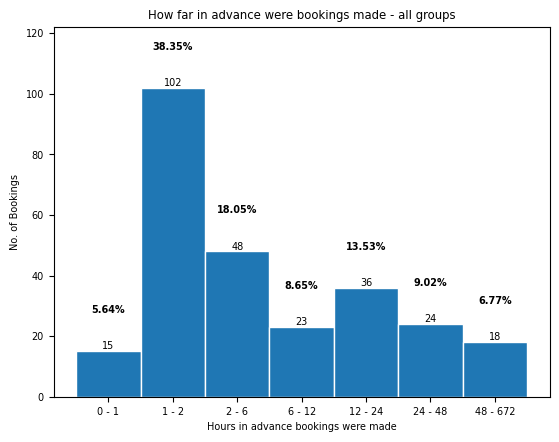

In [42]:
# Booking pattern for all groups

# How far in advance were bookings made?

# Also shows how many bookings were modified

allBookings['diff'] = (allBookings['start'] - allBookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(allBookings['diff'],bins)

# make modified bookings histogram
modified_bookings = allBookings['diff'].where(allBookings['modified_at'] > allBookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# # Plot the nested histogram heights as translucent bars
# nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - all groups")

# # Create legend
# handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
#            Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

# labels = ["All Bookings", "Modified Bookings"]
# plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(allBookings)
print(total_bookings, 'bookings were made in total.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 12, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# # Add the y-axis value at the top of each bin - modified bookings
# for i, bar in enumerate(nested_bars):
#     height = bar.get_height() #this is the value each bin corresponds to
            
#     # Add the y-axis value at the top of each bin
#     ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.savefig('all_users_booking_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

In [42]:
#Group 1

g1Bookings = bookings.loc[bookings['user'].isin(group1)].copy()
g1Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
19,2023-04-02 08:00:00+00:00,1800,lighting (We are in the kitchen. It is getting...,,no,0.15,8,electricity_consumption,10,2023-03-29 17:47:00+00:00,2023-03-29 17:47:00+00:00
24,2023-04-07 09:00:00+00:00,3600,\n Activity Type\n ...,Hoovering. It's a Friday thing! Probably for 3...,yes,1.00,8,electricity_consumption,10,2023-04-07 08:01:49+00:00,2023-04-07 08:01:49+00:00
25,2023-04-08 15:00:00+00:00,16200,oven (the oven is on and also the computer and...,roasting half a leg of lamb slowly,yes,0.78,11,electricity_consumption,12,2023-04-07 11:18:54+00:00,2023-04-07 10:13:53+00:00
26,2023-04-07 12:08:00+00:00,5400,washing_and_drying,making use of sun to dry clothes,no,0.26,11,electricity_consumption,12,2023-04-07 11:22:13+00:00,2023-04-07 07:20:53+00:00
27,2023-04-08 15:00:00+00:00,18000,oven (the oven is on and also the computer and...,roasting half a lamb,yes,0.78,11,electricity_consumption,12,2023-04-07 11:23:47+00:00,2023-04-07 11:23:47+00:00
...,...,...,...,...,...,...,...,...,...,...,...
132,2023-05-11 12:30:00+00:00,1800,toaster (Afternoon snack before working at lap...,I want the oven for 30 minutes but that isn't...,somewhat,0.23,8,electricity_consumption,10,2023-05-11 09:53:50+00:00,2023-05-11 09:53:50+00:00
136,2023-05-11 19:00:00+00:00,3600,oven (Baking),,somewhat,0.70,8,electricity_consumption,10,2023-05-11 11:52:50+00:00,2023-05-11 11:52:50+00:00
137,2023-05-12 09:00:00+00:00,7200,dishwasher (30min),,no,0.44,10,electricity_consumption,11,2023-05-12 07:44:33+00:00,2023-05-12 07:44:33+00:00
138,2023-05-12 10:00:00+00:00,3600,washing_and_drying (30min),,no,0.29,10,electricity_consumption,11,2023-05-12 07:45:19+00:00,2023-05-12 06:45:09+00:00


92 bookings were made by Group 1.
22 of those bookings were modified.


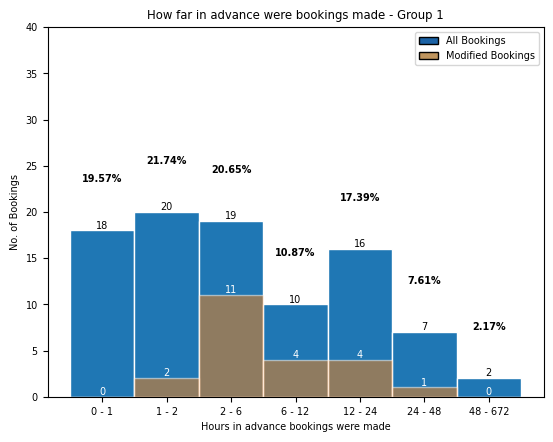

In [44]:
# Booking pattern for group 1

# How far in advance was a booking made in hours?
g1Bookings['diff'] = (g1Bookings['start'] - g1Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g1Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g1Bookings['diff'].where(g1Bookings['modified_at'] > g1Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 1")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g1Bookings)
print(total_bookings, 'bookings were made by Group 1.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 1 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [35]:
# pp = g1Bookings.groupby('user')['diff']
# # ff = pp.agg({'measurement':'count'})
# pp.plot.hist(legend=True)


# g1Bookings['diff'].hist(by=g1Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [14]:
#Group 2

g2Bookings = bookings.loc[bookings['user'].isin(group2)].copy()
g2Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
140,2023-06-05 19:00:00+00:00,1800,hob (30min),"I wanted to put the oven on for dinner, but t...",yes,0.06,11,electricity_consumption,17,2023-06-05 17:33:43+00:00,2023-06-05 09:28:51+00:00
141,2023-06-05 20:00:00+00:00,1800,watching_tv (30min),noted : I think that might use all the solar i...,yes,0.20,11,electricity_consumption,17,2023-06-05 17:36:20+00:00,2023-06-05 16:35:05+00:00
142,2023-06-10 09:00:00+00:00,3600,washing_and_drying (30min),Totally flexible but thought I'd get in there ...,yes,0.48,14,electricity_consumption,15,2023-06-08 17:25:05+00:00,2023-06-06 05:15:53+00:00
143,2023-06-06 10:00:00+00:00,1800,washing_and_drying (30min),,no,0.67,8,electricity_consumption,16,2023-06-06 08:51:46+00:00,2023-06-06 08:51:46+00:00
144,2023-06-06 10:20:00+00:00,1800,oven (30min),,no,0.53,11,electricity_consumption,17,2023-06-06 09:17:56+00:00,2023-06-06 09:17:56+00:00
...,...,...,...,...,...,...,...,...,...,...,...
283,2023-06-27 14:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-27 12:05:06+00:00,2023-06-27 12:05:06+00:00
284,2023-06-27 15:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-27 12:05:29+00:00,2023-06-27 12:05:29+00:00
285,2023-06-27 16:00:00+00:00,3600,computer (60min),,yes,0.16,11,electricity_consumption,17,2023-06-27 12:05:42+00:00,2023-06-27 11:05:30+00:00
286,2023-06-28 13:00:00+00:00,3600,computer (60min),,somewhat,0.16,11,electricity_consumption,17,2023-06-28 10:54:30+00:00,2023-06-28 10:54:30+00:00


115 bookings were made by Group 2.
18 of those bookings were modified.


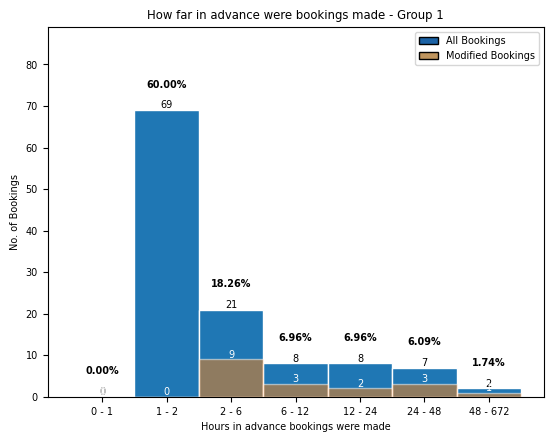

In [132]:
# Booking pattern for group 2

# How far in advance was a booking made in hours?
g2Bookings['diff'] = (g2Bookings['start'] - g2Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g2Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g2Bookings['diff'].where(g2Bookings['modified_at'] > g2Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 2")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g2Bookings)
print(total_bookings, 'bookings were made by Group 2.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 2 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 20  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [34]:
# pp = g2Bookings.groupby('user')['diff']
# # ff = pp.agg({'measurement':'count'})
# pp.plot.hist(legend=True)


# g2Bookings['diff'].hist(by=g2Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [16]:
#Group 3

g3Bookings = bookings.loc[bookings['user'].isin(group3)].copy()
g3Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
240,2023-06-20 15:15:00+00:00,1800,watching_tv (30min),I can watch the TV Later in the day but my fav...,somewhat,0.05,16,electricity_consumption,20,2023-06-20 14:13:57+00:00,2023-06-20 14:13:57+00:00
242,2023-06-20 18:00:00+00:00,1800,other (30min),Using HOB for dinner.,no,0.05,16,electricity_consumption,20,2023-06-20 16:50:42+00:00,2023-06-20 16:50:42+00:00
245,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:41:28+00:00,2023-06-21 14:41:28+00:00
246,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:41:47+00:00,2023-06-21 14:41:47+00:00
247,2023-06-22 00:00:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:42:13+00:00,2023-06-21 14:42:13+00:00
248,2023-06-22 16:30:00+00:00,5400,oven (30min),,somewhat,0.14,15,electricity_consumption,19,2023-06-21 14:44:05+00:00,2023-06-21 14:44:05+00:00
249,2023-06-21 22:00:00+00:00,5400,dishwasher (90min),,yes,0.86,5,electricity_consumption,21,2023-06-21 17:08:30+00:00,2023-06-21 17:08:30+00:00
250,2023-06-21 19:00:00+00:00,1800,hob (30min),,yes,0.52,5,electricity_consumption,21,2023-06-21 17:09:31+00:00,2023-06-21 17:09:31+00:00
252,2023-06-22 10:00:00+00:00,5400,dishwasher (30min),I'd like to do this while Im out - leaving at...,somewhat,0.05,15,electricity_consumption,19,2023-06-22 08:36:35+00:00,2023-06-22 08:36:35+00:00
257,2023-06-24 15:52:00+00:00,3600,other (30min),Ps4 being used with TV,somewhat,0.05,16,electricity_consumption,20,2023-06-24 14:51:12+00:00,2023-06-24 14:51:12+00:00


40 bookings were made by Group 3.
2 of those bookings were modified.


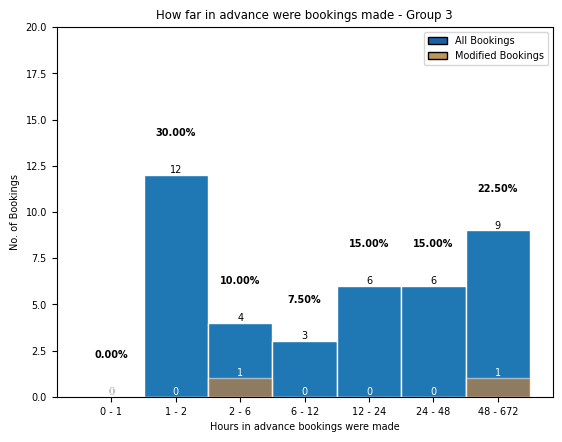

In [46]:
# Booking pattern for group 3

# How far in advance was a booking made in hours?
g3Bookings['diff'] = (g3Bookings['start'] - g3Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g3Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g3Bookings['diff'].where(g3Bookings['modified_at'] > g3Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 3")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g3Bookings)
print(total_bookings, 'bookings were made by Group 3.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 3 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 8  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [32]:
# pp = g3Bookings.groupby('user')['diff']
# # ff = pp.agg({'measurement':'count'})
# pp.plot.hist(legend=True)


# g3Bookings['diff'].hist(by=g3Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [18]:
#Group 4

g4Bookings = bookings.loc[bookings['user'].isin(group4)].copy()
g4Bookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
298,2023-07-08 14:00:00+00:00,1800,oven (30min),,yes,0.08,8,electricity_consumption,25,2023-07-07 17:34:49+00:00,2023-07-07 17:34:49+00:00
299,2023-07-20 08:00:00+00:00,3600,washing_and_drying (60min),,yes,0.34,16,electricity_consumption,28,2023-07-19 19:10:16+00:00,2023-07-19 19:10:16+00:00
300,2023-07-20 09:00:00+00:00,1800,toaster (30min),,yes,0.07,16,electricity_consumption,28,2023-07-19 19:19:44+00:00,2023-07-19 19:19:44+00:00
301,2023-07-21 09:00:00+00:00,1800,kettle (30min),,yes,0.04,8,electricity_consumption,25,2023-07-19 23:12:27+00:00,2023-07-19 23:12:27+00:00
302,2023-07-20 14:00:00+00:00,1800,other (30min),making smoothies,yes,0.39,16,electricity_consumption,28,2023-07-20 11:16:33+00:00,2023-07-20 11:16:33+00:00
303,2023-07-20 14:00:00+00:00,5400,Other,Using food chopper and hob (I am cooking),yes,1.00,2,electricity_consumption,24,2023-07-20 11:42:28+00:00,2023-07-20 09:41:20+00:00
304,2023-07-20 18:30:00+00:00,1800,Other,dinner,no,1.00,2,electricity_consumption,24,2023-07-20 14:31:15+00:00,2023-07-20 14:31:15+00:00
305,2023-07-21 08:00:00+00:00,1800,meal_dinner (30min),,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:33+00:00,2023-07-20 16:28:33+00:00
306,2023-07-22 08:00:00+00:00,3600,Other,,yes,0.30,16,electricity_consumption,28,2023-07-20 16:28:47+00:00,2023-07-20 16:28:47+00:00
307,2023-07-24 08:00:00+00:00,9000,Other,Laundry (2.5 hour wash cycle) + vacuuming,no,1.00,2,electricity_consumption,24,2023-07-20 18:37:42+00:00,2023-07-20 14:28:55+00:00


28 bookings were made by Group 4.
2 of those bookings were modified.


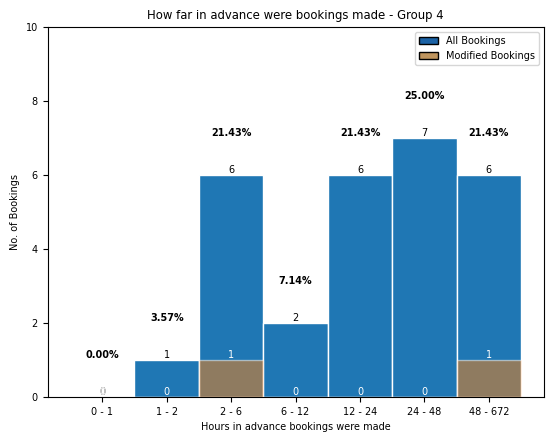

In [47]:
# Booking pattern for group 4

# How far in advance was a booking made in hours?
g4Bookings['diff'] = (g4Bookings['start'] - g4Bookings['created_at']) /pd.Timedelta(1, "h")

plt.rcParams.update({'font.size': 7})

# bins=[<1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[0,1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(g4Bookings['diff'],bins)

# make modified bookings histogram
modified_bookings = g4Bookings['diff'].where(g4Bookings['modified_at'] > g4Bookings['created_at'])
nested_hist, nested_bin_edges = np.histogram(modified_bookings, bins)

fig,ax = plt.subplots()

# Plot the histogram heights against integers on the x axis
outer_bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Plot the nested histogram heights as translucent bars
nested_bars = ax.bar(range(len(nested_hist)), nested_hist, width=1, edgecolor="White", alpha=0.5)

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Hours in advance bookings were made")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("How far in advance were bookings made - Group 4")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k"),
           Rectangle((0, 0), 1, 1, color="#bf955e", ec="k")]

labels = ["All Bookings", "Modified Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(g4Bookings)
print(total_bookings, 'bookings were made by Group 4.')
print(modified_bookings.dropna().count(), 'of those bookings were modified.')

# Add the y-axis value at the top of each bin - all group 4 bookings
for i, bar in enumerate(outer_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    
# Add the y-axis value at the top of each bin - modified bookings in group 1
for i, bar in enumerate(nested_bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom', color='w')
    
# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 3  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [33]:
# pp = g4Bookings.groupby('user')['diff']
# # ff = pp.agg({'measurement':'count'})
# pp.plot.hist(legend=True)


# g4Bookings['diff'].hist(by=g4Bookings['user'],sharey=True, sharex=True,figsize=(10, 8))

In [44]:
# In cases where a booking was made in advance - an hour or more in advance - does the weather forecast change significantly when it is time for the activity?

advance_bookings = allBookings.where(allBookings['diff'] >= 1).dropna().copy()
# advance_bookings

# Populating the forecast value at creation
for index, row in advance_bookings.iterrows():
    rounded_minute = row['created_at'].minute - row['created_at'].minute % 15
    
    rounded_created_at = datetime.datetime(
            row['created_at'].year,
            row['created_at'].month,
            row['created_at'].day,
            row['created_at'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['created_at'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.time != rounded_created_at.strftime('%Y-%m-%dT%H:%M:%SZ')].index)
    data = data.drop(data[data.minutes_offset < 0].index)
    
    minutes_offset = ((row['start'] - row['created_at']).total_seconds())/60
    
    for data_index, data_row in data.iterrows():
        
        # Getting the closest minutes offset value
        data['absolute_difference'] = np.abs(data['minutes_offset'] - minutes_offset)
        closest_index = data['absolute_difference'].idxmin()
        solar_value_at_creation = data.loc[closest_index, 'value']
        
        # print(f"Closest solar value to {minutes_offset}: {solar_value_at_creation}")
        advance_bookings.loc[advance_bookings['created_at'] == row['created_at'], 'solar_value_at_creation'] = solar_value_at_creation            
  
advance_bookings['solar_value_at_creation'].fillna(0, inplace=True)

      
    
# Populating the forecast value at time of activity
for index, row in advance_bookings.iterrows():
    rounded_minute = row['start'].minute - row['start'].minute % 15
    
    rounded_start_at = datetime.datetime(
            row['start'].year,
            row['start'].month,
            row['start'].day,
            row['start'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['start'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.minutes_offset != 0].index)
    
    for data_index, data_row in data.iterrows():
        data_row['time'] = data_row['time'].replace('T',' ').replace('Z','')
        data_row['time'] = datetime.datetime.strptime(data_row['time'], "%Y-%m-%d %H:%M:%S")

        if data_row['time'] == rounded_start_at:
            advance_bookings.loc[advance_bookings['start'] == row['start'], 'solar_value_at_start'] = data_row['value']
                 
advance_bookings['solar_value_at_start'].fillna(0, inplace=True)

# Calculate the differences between 'solar_value_at_start' and 'solar_value_at_creation'
advance_bookings['solar_value_differences'] = advance_bookings['solar_value_at_start'] - advance_bookings['solar_value_at_creation']

# Remove bookings where forecast value was not found because the timestamp does not exist in the forecast data
# Likely because they are right on the cusp of the 15 min window and the value used is likely from the previous window
advance_bookings = advance_bookings.drop(advance_bookings[advance_bookings.solar_value_at_creation == 0].index)
advance_bookings = advance_bookings.drop(advance_bookings[advance_bookings.solar_value_at_start == 0].index)

display(advance_bookings.head())

# Minimum difference
min_difference = np.min(advance_bookings['solar_value_differences'])
print("Min Difference between 'solar_value_at_start' and 'solar_value_at_creation':", min_difference)

# Maximimum difference
max_difference = np.max(advance_bookings['solar_value_differences'])
print("Max Difference between 'solar_value_at_start' and 'solar_value_at_creation':", max_difference)

# Mean
mean_difference = np.mean(advance_bookings['solar_value_differences'])
print("Mean Difference between 'solar_value_at_start' and 'solar_value_at_creation':", mean_difference)

# Median
median_difference = np.median(advance_bookings['solar_value_differences'])
print("Median Difference between 'solar_value_at_start' and 'solar_value_at_creation':", median_difference)

# Standard deviation
std_deviation = np.std(advance_bookings['solar_value_differences'])
print("Standard Deviation:", std_deviation)

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,diff,solar_value_at_creation,solar_value_at_start,solar_value_differences
34,2023-04-21 08:30:00+00:00,5400.0,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8.0,electricity_consumption,10.0,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,3.237778,275.0,275.0,0.0
35,2023-04-21 17:00:00+00:00,1800.0,oven (the oven is on and also the computer and...,,no,0.78,11.0,electricity_consumption,12.0,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00,8.234167,279.0,150.0,-129.0
41,2023-04-22 11:20:00+00:00,7200.0,oven (baking),,no,0.46,10.0,electricity_consumption,11.0,2023-04-22 08:43:48+00:00,2023-04-22 08:43:48+00:00,2.603333,701.0,958.0,257.0
43,2023-04-22 16:00:00+00:00,5400.0,oven (the oven is on and also the computer and...,,somewhat,0.78,11.0,electricity_consumption,12.0,2023-04-22 11:02:50+00:00,2023-04-22 09:58:55+00:00,6.018056,752.0,232.0,-520.0
44,2023-04-23 18:00:00+00:00,5400.0,oven (the oven is on and also the computer and...,evening roast,somewhat,0.78,11.0,electricity_consumption,12.0,2023-04-22 11:00:48+00:00,2023-04-22 11:00:48+00:00,30.986667,73.0,117.0,44.0


Min Difference between 'solar_value_at_start' and 'solar_value_at_creation': -2526.0
Max Difference between 'solar_value_at_start' and 'solar_value_at_creation': 2270.0
Mean Difference between 'solar_value_at_start' and 'solar_value_at_creation': 5.117924528301887
Median Difference between 'solar_value_at_start' and 'solar_value_at_creation': -15.0
Standard Deviation: 754.5650504357383


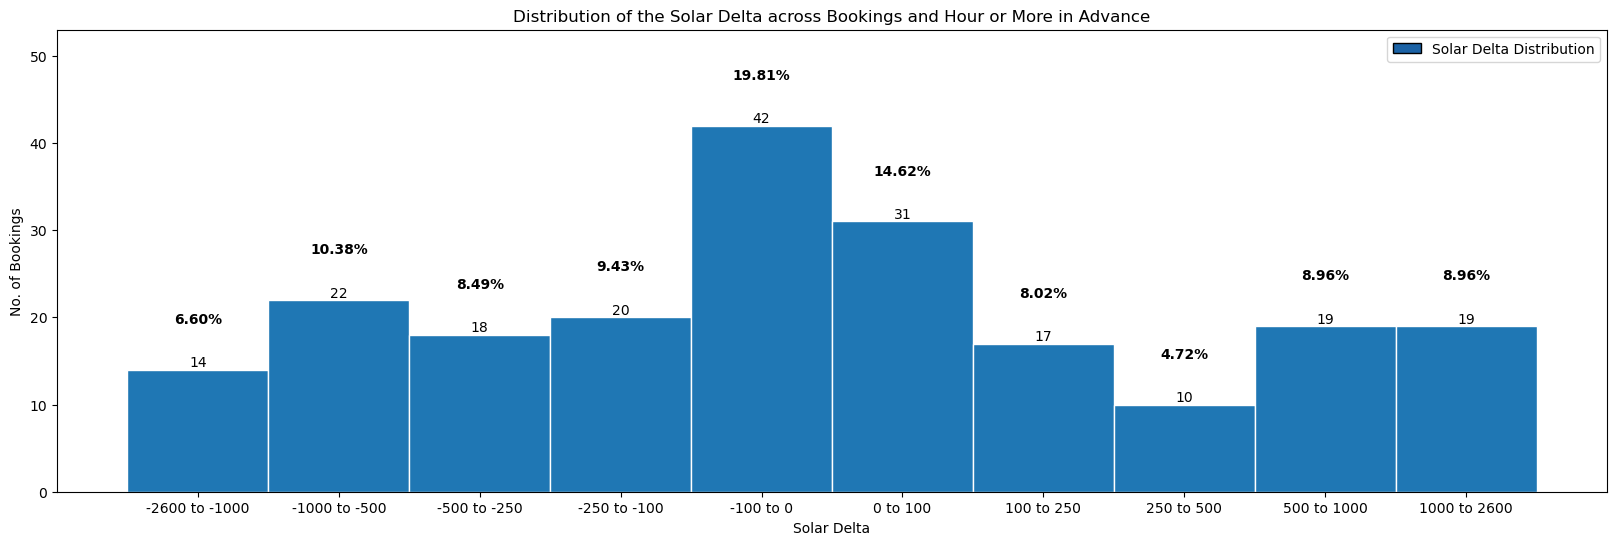

In [105]:
# How is the solar delta distributed in the booking data

plt.rcParams.update({'font.size': 10})

# bins=[<1h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[-2600,-1000,-500,-250,-100,0,100,250,500,1000,2600]

# make solar delta histogram
hist, bin_edges = np.histogram(advance_bookings['solar_value_differences'],bins)

fig, ax = plt.subplots(figsize=(20, 6))  # Adjust the figure size

# Plot the histogram heights against integers on the x axis
bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} to {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Solar Delta")
ax.set_ylabel("No. of Bookings")

# Add the title to the histogram
ax.set_title("Distribution of the Solar Delta across Bookings and Hour or More in Advance")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]
labels = ["Solar Delta Distribution"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(advance_bookings)

# Add the y-axis value at the top of each bin - all group 4 bookings
for i, bar in enumerate(bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 5, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

    

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 11  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

Bookings with a large solar delta made up for 34.90566037735849 % of the total bookings made in advance.


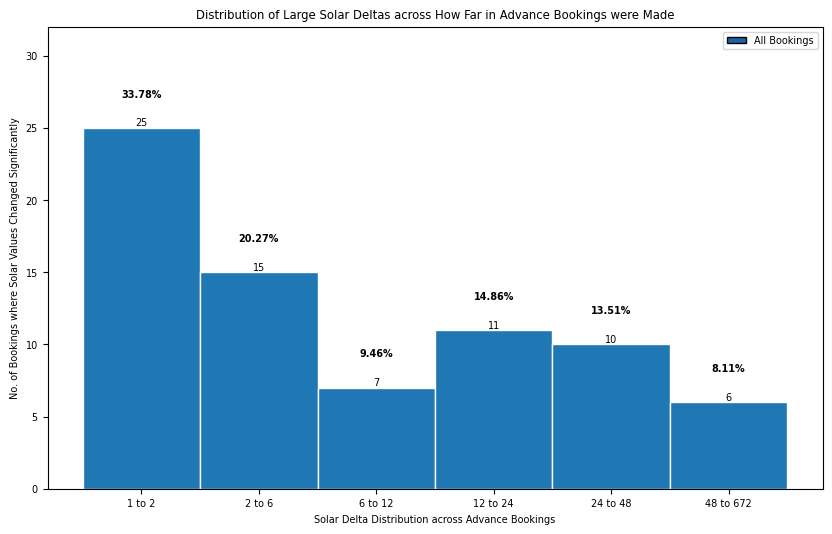

In [113]:
# How do the more extreme solar delta values interact with how far in advance bookings were made

plt.rcParams.update({'font.size': 7})

# Bookings made - an hour or more in advance - with solar deltas between the absolute values of 500 and 2600
advance_bookings_with_large_solar_deltas = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 500) & (abs(advance_bookings['solar_value_differences']) <= 2600)]
# print(len(advance_bookings_with_large_solar_deltas))
# print(len(advance_bookings))

print("Bookings with a large solar delta made up for",(len(advance_bookings_with_large_solar_deltas)/len(advance_bookings))*100, "% of the total bookings made in advance.")

# with pd.option_context('display.max_rows', None):
#     display(advance_bookings_with_large_solar_deltas)

# bins=[>1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[1,2,6,12,24,48,48*14]

# make bookings with large solar deltas histogram
hist, bin_edges = np.histogram(advance_bookings_with_large_solar_deltas['diff'],bins)

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Plot the histogram heights against integers on the x axis
bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} to {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Solar Delta Distribution across Advance Bookings")
ax.set_ylabel("No. of Bookings where Solar Values Changed Significantly")

# Add the title to the histogram
ax.set_title("Distribution of Large Solar Deltas across How Far in Advance Bookings were Made")

# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["All Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(advance_bookings_with_large_solar_deltas)

# Add the y-axis value at the top of each bin - all group 4 bookings
for i, bar in enumerate(bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 2, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 7  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

Bookings with more conservative solar deltas made up for 59.905660377358494 % of the total bookings made in advance.


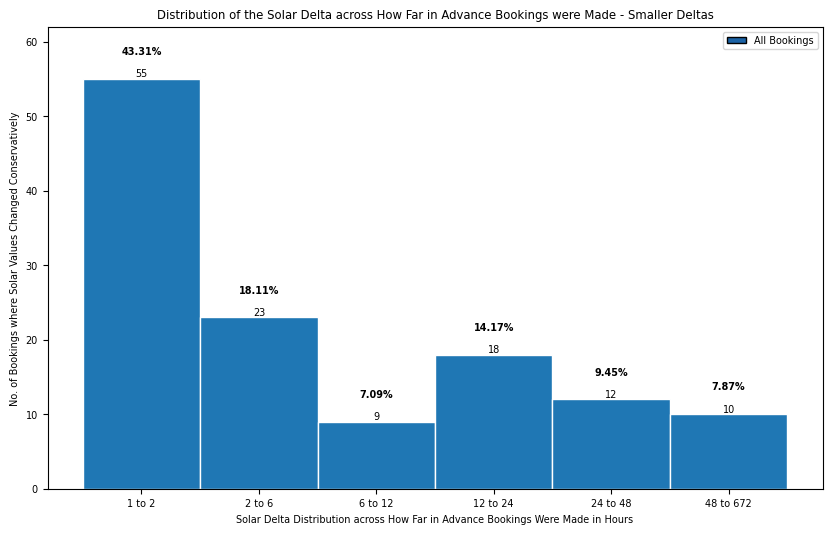

In [114]:
# How do the more conservative solar delta values interact with how far in advance bookings were made

plt.rcParams.update({'font.size': 7})

# Bookings made - an hour or more in advance - with solar deltas between the absolute values of 0 and 500
advance_bookings_with_smaller_solar_deltas = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 0) & (abs(advance_bookings['solar_value_differences']) <= 500)]
# print(len(advance_bookings_with_smaller_solar_deltas))
# print(len(advance_bookings))

print("Bookings with more conservative solar deltas made up for",(len(advance_bookings_with_smaller_solar_deltas)/len(advance_bookings))*100, "% of the total bookings made in advance.")

# with pd.option_context('display.max_rows', None):
#     display(advance_bookings_with_large_solar_deltas)

# bins=[>1h,<2h,<6h,<12h,<24h,<48h,>48h-4w]
bins=[1,2,6,12,24,48,48*14]

# make bookings histogram
hist, bin_edges = np.histogram(advance_bookings_with_smaller_solar_deltas['diff'],bins)

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size

# Plot the histogram heights against integers on the x axis
bars = ax.bar(range(len(hist)), hist, width=1, edgecolor="White") 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i, j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} to {}'.format(bins[i], bins[i+1]) for i, j in enumerate(hist)])

ax.set_xlabel("Solar Delta Distribution across How Far in Advance Bookings Were Made in Hours")
ax.set_ylabel("No. of Bookings where Solar Values Changed Conservatively")

# Add the title to the histogram
ax.set_title("Distribution of the Solar Delta across How Far in Advance Bookings were Made - Smaller Deltas")


# Create legend with hex colors
handles = [Rectangle((0, 0), 1, 1, color="#1b62a5", ec="k")]

labels = ["All Bookings"]
plt.legend(handles, labels)

# Calculate the total number of bookings for percentage calculation
total_bookings = len(advance_bookings_with_smaller_solar_deltas)

# Add the y-axis value at the top of each bin - all group 4 bookings
for i, bar in enumerate(bars):
    height = bar.get_height() #this is the value each bin corresponds to
            
    # Add the y-axis value at the top of each bin
    ax.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha='center', va='bottom')
    
    # Calculate and display the percentage
    percentage = (height / total_bookings) * 100
    ax.text(bar.get_x() + bar.get_width() / 2, height + 3, f"{percentage:.2f}%", ha='center', va='bottom', fontweight='bold')

# Extend the y-axis by setting the minimum and maximum limits
min_y = 0
max_y = max(hist) + 7  # Add some extra space above the highest bar
ax.set_ylim(min_y, max_y)

plt.show()

In [131]:
# Extreme and conservative solar deltas across the booking bins

# 1-2
advance_bookings_large_solar_deltas_1_to_2 = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 500) & (abs(advance_bookings['solar_value_differences']) <= 2600) & (advance_bookings['diff'] >= 1) & (advance_bookings['diff'] < 2)]
advance_bookings_smaller_solar_deltas_1_to_2 = advance_bookings[(abs(advance_bookings['solar_value_differences']) <= 500) & (abs(advance_bookings['solar_value_differences']) > 0) & (advance_bookings['diff'] >= 1) & (advance_bookings['diff'] < 2)]
advance_bookings_accurate_weather_1_to_2 = advance_bookings[(abs(advance_bookings['solar_value_differences']) == 0) & (advance_bookings['diff'] >= 1) & (advance_bookings['diff'] < 2)]

advance_bookings_1_to_2 = advance_bookings[(advance_bookings['diff'] >= 1) & (advance_bookings['diff'] < 2)]

# print(len(advance_bookings_large_solar_deltas_1_to_2))
# print(len(advance_bookings_smaller_solar_deltas_1_to_2))
# print(len(advance_bookings_accurate_weather_1_to_2))
# print(len(advance_bookings_1_to_2))

print(" ")
print("Bookings made 1 - 2 Hours in Advance:")
print(" ")
print("Out of the", len(advance_bookings_1_to_2), "bookings made an hour to two hours in advance:", len(advance_bookings_large_solar_deltas_1_to_2), "of those bookings saw the weather change significantly;", len(advance_bookings_smaller_solar_deltas_1_to_2), "did not have the weather change significantly;", len(advance_bookings_accurate_weather_1_to_2), "bookings exprienced an accurate weather forecast.")
print(" ")
print("________________________")
print(" ")

# 2-6
advance_bookings_large_solar_deltas_2_to_6 = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 500) & (abs(advance_bookings['solar_value_differences']) <= 2600) & (advance_bookings['diff'] >= 2) & (advance_bookings['diff'] < 6)]
advance_bookings_smaller_solar_deltas_2_to_6 = advance_bookings[(abs(advance_bookings['solar_value_differences']) <= 500) & (abs(advance_bookings['solar_value_differences']) > 0) & (advance_bookings['diff'] >= 2) & (advance_bookings['diff'] < 6)]
advance_bookings_accurate_weather_2_to_6 = advance_bookings[(abs(advance_bookings['solar_value_differences']) == 0) & (advance_bookings['diff'] >= 2) & (advance_bookings['diff'] < 6)]

advance_bookings_2_to_6 = advance_bookings[(advance_bookings['diff'] >= 2) & (advance_bookings['diff'] < 6)]

# print(len(advance_bookings_large_solar_deltas_2_to_6))
# print(len(advance_bookings_smaller_solar_deltas_2_to_6))
# print(len(advance_bookings_accurate_weather_2_to_6))
# print(len(advance_bookings_2_to_6))

print("Bookings made 2 - 6 Hours in Advance:")
print(" ")
print("Out of the", len(advance_bookings_2_to_6), "bookings made two to six hours in advance:", len(advance_bookings_large_solar_deltas_2_to_6), "of those bookings saw the weather change significantly;", len(advance_bookings_smaller_solar_deltas_2_to_6), "did not have the weather change significantly;", len(advance_bookings_accurate_weather_2_to_6), "bookings exprienced an accurate weather forecast.")
print(" ")
print("________________________")
print(" ")

# 6-12
advance_bookings_large_solar_deltas_6_to_12 = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 500) & (abs(advance_bookings['solar_value_differences']) <= 2600) & (advance_bookings['diff'] >= 6) & (advance_bookings['diff'] < 12)]
advance_bookings_smaller_solar_deltas_6_to_12 = advance_bookings[(abs(advance_bookings['solar_value_differences']) <= 500) & (abs(advance_bookings['solar_value_differences']) > 0) & (advance_bookings['diff'] >= 6) & (advance_bookings['diff'] < 12)]
advance_bookings_accurate_weather_6_to_12 = advance_bookings[(abs(advance_bookings['solar_value_differences']) == 0) & (advance_bookings['diff'] >= 6) & (advance_bookings['diff'] < 12)]

advance_bookings_6_to_12 = advance_bookings[(advance_bookings['diff'] >= 6) & (advance_bookings['diff'] < 12)]

# print(len(advance_bookings_large_solar_deltas_6_to_12))
# print(len(advance_bookings_smaller_solar_deltas_6_to_12))
# print(len(advance_bookings_accurate_weather_6_to_12))
# print(len(advance_bookings_6_to_12))

print("Bookings made 6 - 12 Hours in Advance:")
print(" ")
print("Out of the", len(advance_bookings_6_to_12), "bookings made six to twelve hours in advance:", len(advance_bookings_large_solar_deltas_6_to_12), "of those bookings saw the weather change significantly;", len(advance_bookings_smaller_solar_deltas_6_to_12), "did not have the weather change significantly;", len(advance_bookings_accurate_weather_6_to_12), "bookings exprienced an accurate weather forecast.")
print(" ")
print("________________________")
print(" ")

# 12-24
advance_bookings_large_solar_deltas_12_to_24 = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 500) & (abs(advance_bookings['solar_value_differences']) <= 2600) & (advance_bookings['diff'] >= 12) & (advance_bookings['diff'] < 24)]
advance_bookings_smaller_solar_deltas_12_to_24 = advance_bookings[(abs(advance_bookings['solar_value_differences']) <= 500) & (abs(advance_bookings['solar_value_differences']) > 0) & (advance_bookings['diff'] >= 12) & (advance_bookings['diff'] < 24)]
advance_bookings_accurate_weather_12_to_24 = advance_bookings[(abs(advance_bookings['solar_value_differences']) == 0) & (advance_bookings['diff'] >= 12) & (advance_bookings['diff'] < 24)]

advance_bookings_12_to_24 = advance_bookings[(advance_bookings['diff'] >= 12) & (advance_bookings['diff'] < 24)]

# print(len(advance_bookings_large_solar_deltas_12_to_24))
# print(len(advance_bookings_smaller_solar_deltas_12_to_24))
# print(len(advance_bookings_accurate_weather_12_to_24))
# print(len(advance_bookings_12_to_24))

print("Bookings made 12 - 24 Hours in Advance:")
print(" ")
print("Out of the", len(advance_bookings_12_to_24), "bookings made twelve to twenty-four hours in advance:", len(advance_bookings_large_solar_deltas_12_to_24), "of those bookings saw the weather change significantly;", len(advance_bookings_smaller_solar_deltas_12_to_24), "did not have the weather change significantly;", len(advance_bookings_accurate_weather_12_to_24), "bookings exprienced an accurate weather forecast.")
print(" ")
print("________________________")
print(" ")

# 24-48
advance_bookings_large_solar_deltas_24_to_48 = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 500) & (abs(advance_bookings['solar_value_differences']) <= 2600) & (advance_bookings['diff'] >= 24) & (advance_bookings['diff'] < 48)]
advance_bookings_smaller_solar_deltas_24_to_48 = advance_bookings[(abs(advance_bookings['solar_value_differences']) <= 500) & (abs(advance_bookings['solar_value_differences']) > 0) & (advance_bookings['diff'] >= 24) & (advance_bookings['diff'] < 48)]
advance_bookings_accurate_weather_24_to_48 = advance_bookings[(abs(advance_bookings['solar_value_differences']) == 0) & (advance_bookings['diff'] >= 24) & (advance_bookings['diff'] < 48)]

advance_bookings_24_to_48 = advance_bookings[(advance_bookings['diff'] >= 24) & (advance_bookings['diff'] < 48)]

# print(len(advance_bookings_large_solar_deltas_24_to_48))
# print(len(advance_bookings_smaller_solar_deltas_24_to_48))
# print(len(advance_bookings_accurate_weather_24_to_48))
# print(len(advance_bookings_24_to_48))

print("Bookings made 24 - 48 Hours in Advance:")
print(" ")
print("Out of the", len(advance_bookings_24_to_48), "bookings made twelve to twenty-four hours in advance:", len(advance_bookings_large_solar_deltas_24_to_48), "of those bookings saw the weather change significantly;", len(advance_bookings_smaller_solar_deltas_24_to_48), "did not have the weather change significantly;", len(advance_bookings_accurate_weather_24_to_48), "bookings exprienced an accurate weather forecast.")
print(" ")
print("________________________")
print(" ")

# >48
advance_bookings_large_solar_deltas_over_48 = advance_bookings[(abs(advance_bookings['solar_value_differences']) > 500) & (abs(advance_bookings['solar_value_differences']) <= 2600) & (advance_bookings['diff'] >= 48)]
advance_bookings_smaller_solar_deltas_over_48 = advance_bookings[(abs(advance_bookings['solar_value_differences']) <= 500) & (abs(advance_bookings['solar_value_differences']) > 0) & (advance_bookings['diff'] >= 48)]
advance_bookings_accurate_weather_over_48 = advance_bookings[(abs(advance_bookings['solar_value_differences']) == 0) & (advance_bookings['diff'] >= 48)]

advance_bookings_over_48 = advance_bookings[(advance_bookings['diff'] >= 48)]

# print(len(advance_bookings_large_solar_deltas_over_48))
# print(len(advance_bookings_smaller_solar_deltas_over_48))
# print(len(advance_bookings_accurate_weather_over_48))
# print(len(advance_bookings_over_48))

print("Bookings made over 48 Hours in Advance:")
print(" ")
print("Out of the", len(advance_bookings_over_48), "bookings made twelve to twenty-four hours in advance:", len(advance_bookings_large_solar_deltas_over_48), "of those bookings saw the weather change significantly;", len(advance_bookings_smaller_solar_deltas_over_48), "did not have the weather change significantly;", len(advance_bookings_accurate_weather_over_48), "bookings exprienced an accurate weather forecast.")
print(" ")
print(" ")

 
Bookings made 1 - 2 Hours in Advance:
 
Out of the 89 bookings made an hour to two hours in advance: 25 of those bookings saw the weather change significantly; 55 did not have the weather change significantly; 9 bookings exprienced an accurate weather forecast.
 
________________________
 
Bookings made 2 - 6 Hours in Advance:
 
Out of the 40 bookings made two to six hours in advance: 15 of those bookings saw the weather change significantly; 23 did not have the weather change significantly; 2 bookings exprienced an accurate weather forecast.
 
________________________
 
Bookings made 6 - 12 Hours in Advance:
 
Out of the 16 bookings made six to twelve hours in advance: 7 of those bookings saw the weather change significantly; 9 did not have the weather change significantly; 0 bookings exprienced an accurate weather forecast.
 
________________________
 
Bookings made 12 - 24 Hours in Advance:
 
Out of the 29 bookings made twelve to twenty-four hours in advance: 11 of those bookings 

In [11]:
# Do people always book when it's most sunny - at the peak?

advance_bookings = allBookings.where(allBookings['diff'] >= 1).dropna().copy()
advance_bookings

# Populating the time stamp of peak solar generation
for index, row in advance_bookings.iterrows():
    rounded_minute = row['created_at'].minute - row['created_at'].minute % 15
    
    rounded_created_at = datetime.datetime(
            row['created_at'].year,
            row['created_at'].month,
            row['created_at'].day,
            row['created_at'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['created_at'].strftime('%Y-%m-%d') + ".csv"
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.minutes_offset != 0].index)
    
    peak_solar_value = max(data['value'])
    peak_time = data.loc[data['value'] == peak_solar_value, 'time'].iloc[0]
    advance_bookings.at[index, 'peak_time'] = pd.to_datetime(peak_time,format='%Y-%m-%d %H:%M:%S')

# Calculate the time range of +- 2 hour
peak_start = advance_bookings['peak_time'] - pd.Timedelta(hours=2)
peak_end = advance_bookings['peak_time'] + pd.Timedelta(hours=2)

# Compare
advance_bookings['booked_at_peak'] = (peak_start <= advance_bookings['start']) & \
                                      (advance_bookings['start'] <= peak_end)

# Count the number of bookings that were booked at the peak time range
booked_at_peak = advance_bookings['booked_at_peak'].sum()

print("Number of bookings made at peak time:", booked_at_peak)
print("Total Number of bookings:", len(advance_bookings.index))
# display(advance_bookings)
#     peak_range = peak_time +- 1 hour

Number of bookings made at peak time: 67
Total Number of bookings: 251


In [47]:
# At the time of start - were there some bookings that should have been modified due to changes in solar availability?

allBookings = validBookings.loc[validBookings['user'].isin(allGroups)].copy()  

allBookings.sort_values(by='start')

allBookings['watts_needed_for_activity'] = (allBookings['consumption'] * 1000) / (allBookings['duration_seconds'] / 3600)     
    
# Populating the forecast value at time of activity
for index, row in allBookings.iterrows():
    rounded_minute = row['start'].minute - row['start'].minute % 15
    
    rounded_start_at = datetime.datetime(
            row['start'].year,
            row['start'].month,
            row['start'].day,
            row['start'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['start'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.minutes_offset != 0].index)
    
    for data_index, data_row in data.iterrows():
        data_row['time'] = data_row['time'].replace('T',' ').replace('Z','')
        data_row['time'] = datetime.datetime.strptime(data_row['time'], "%Y-%m-%d %H:%M:%S")

        if data_row['time'] == rounded_start_at:
            allBookings.loc[allBookings['start'] == row['start'], 'solar_value_at_start'] = data_row['value']
                 
allBookings['solar_value_at_start'].fillna(0, inplace=True)

# Remove bookings where forecast value was not found because the timestamp does not exist in the forecast data
allBookings = allBookings.drop(allBookings[allBookings.solar_value_at_start == 0].index)

# Creating an array of queues for the hour, for each booking
allBookings['queue'] = ''

# Check if there are earlier bookings in that hour slot to determine how many watts will be required in conjunction to that booking
for i, row in allBookings.iterrows():
    current_time = row['start']
    previous_bookings = allBookings[(allBookings['start'] < current_time) &
                           (allBookings['start'].dt.hour == current_time.hour) &
                           (allBookings['start'].dt.date == current_time.date())]['watts_needed_for_activity'].tolist()

    allBookings.at[i, 'queue'] = previous_bookings
    
allBookings['queue_sum'] = allBookings['queue'].apply(sum)

# Check if solar is overrun
allBookings['hourly_conjunctive_watts_needed'] = allBookings['queue_sum'] + allBookings['watts_needed_for_activity']
overbooked_activities_at_start = allBookings[allBookings['hourly_conjunctive_watts_needed'] > allBookings['solar_value_at_start']]

# Summary of findings
print("There were", len(overbooked_activities_at_start), "activities/bookings -",((len(overbooked_activities_at_start)/len(allBookings)))*100, "percent" ,"-", "that overrun the solar resources that were available at the time of start.")

with pd.option_context('display.max_rows', None):
    display(allBookings) 
     
    

There were 75 activities/bookings - 32.327586206896555 percent - that overrun the solar resources that were available at the time of start.


,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,watts_needed_for_activity,solar_value_at_start,queue,queue_sum,hourly_conjunctive_watts_needed
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,386.666667,275.0,[],0.0,386.666667
35,2023-04-21 17:00:00+00:00,1800,oven (the oven is on and also the computer and...,,no,0.78,11,electricity_consumption,12,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00,1560.000000,150.0,[],0.0,1560.000000
41,2023-04-22 11:20:00+00:00,7200,oven (baking),,no,0.46,10,electricity_consumption,11,2023-04-22 08:43:48+00:00,2023-04-22 08:43:48+00:00,230.000000,958.0,[520.0],520.0,750.000000
42,2023-04-22 11:00:00+00:00,1800,washing_and_drying,just checked and there is space for me to do ...,somewhat,0.26,11,electricity_consumption,12,2023-04-22 10:57:48+00:00,2023-04-22 10:57:48+00:00,520.000000,666.0,[],0.0,520.000000
43,2023-04-22 16:00:00+00:00,5400,oven (the oven is on and also the computer and...,,somewhat,0.78,11,electricity_consumption,12,2023-04-22 11:02:50+00:00,2023-04-22 09:58:55+00:00,520.000000,232.0,[],0.0,520.000000
44,2023-04-23 18:00:00+00:00,5400,oven (the oven is on and also the computer and...,evening roast,somewhat,0.78,11,electricity_consumption,12,2023-04-22 11:00:48+00:00,2023-04-22 11:00:48+00:00,520.000000,117.0,[],0.0,520.000000
45,2023-04-23 13:15:00+00:00,7200,oven (baking),actually charging my van and not baking,somewhat,0.46,10,electricity_consumption,11,2023-04-23 12:13:16+00:00,2023-04-23 12:13:16+00:00,230.000000,364.0,[],0.0,230.000000
46,2023-04-23 15:00:00+00:00,1800,washing_and_drying,,somewhat,0.29,10,electricity_consumption,11,2023-04-23 14:15:02+00:00,2023-04-23 14:15:02+00:00,580.000000,292.0,[],0.0,580.000000
47,2023-04-24 14:00:00+00:00,7200,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8,electricity_consumption,10,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00,720.000000,483.0,[],0.0,720.000000
48,2023-04-25 08:00:00+00:00,3600,toaster,,no,0.13,11,electricity_consumption,12,2023-04-24 12:59:00+00:00,2023-04-24 12:59:00+00:00,130.000000,2247.0,[],0.0,130.000000


In [38]:
# At the time of creation - were there some bookings that should have been modified due to a lack of sufficient solar?

allBookings = validBookings.loc[validBookings['user'].isin(allGroups)].copy()  

allBookings.sort_values(by='created_at')

allBookings['watts_needed_for_activity'] = (allBookings['consumption'] * 1000) / (allBookings['duration_seconds'] / 3600)     

# Populating the forecast value at creation
for index, row in allBookings.iterrows():
    rounded_minute = row['created_at'].minute - row['created_at'].minute % 15
    
    rounded_created_at = datetime.datetime(
            row['created_at'].year,
            row['created_at'].month,
            row['created_at'].day,
            row['created_at'].hour,
            rounded_minute, 
            0)

    booking_forecast = "../ec_data/solar_export/" + row['created_at'].strftime('%Y-%m-%d') + ".csv"
    
    data = pd.read_csv(booking_forecast)
    data = data.drop(data[data.time != rounded_created_at.strftime('%Y-%m-%dT%H:%M:%SZ')].index)
    data = data.drop(data[data.minutes_offset < 0].index)
    
    minutes_offset = ((row['start'] - row['created_at']).total_seconds())/60
    
    for data_index, data_row in data.iterrows():
        
        # Getting the closest minutes offset value
        data['absolute_difference'] = np.abs(data['minutes_offset'] - minutes_offset)
        closest_index = data['absolute_difference'].idxmin()
        solar_value_at_creation = data.loc[closest_index, 'value']
        
        # print(f"Closest solar value to {minutes_offset}: {solar_value_at_creation}")
        allBookings.loc[allBookings['created_at'] == row['created_at'], 'solar_value_at_creation'] = solar_value_at_creation            
  
allBookings['solar_value_at_creation'].fillna(0, inplace=True)

# Remove bookings where forecast value was not found because the timestamp does not exist in the forecast data
allBookings = allBookings.drop(allBookings[allBookings.solar_value_at_creation == 0].index)

    
# Creating an array of queues for the hour, for each booking
allBookings['queue'] = ''

for i, row in allBookings.iterrows():
    current_time = row['created_at']
    previous_bookings = allBookings[(allBookings['created_at'] < current_time) &
                           (allBookings['created_at'].dt.hour == current_time.hour) &
                           (allBookings['created_at'].dt.date == current_time.date())]['watts_needed_for_activity'].tolist()

    allBookings.at[i, 'queue'] = previous_bookings

allBookings['queue_sum'] = allBookings['queue'].apply(sum)

# Now, you can check for overbooked activities at the start
overbooked_activities_at_creation = allBookings[(allBookings['queue_sum'] + allBookings['watts_needed_for_activity']) > allBookings['solar_value_at_creation']]

# Summary of findings
print("There were", len(overbooked_activities_at_creation), "-",((len(overbooked_activities_at_creation)/len(allBookings)))*100, "percent" ,"-", "activities that booked over the solar resources visualised at the time of creation.")


with pd.option_context('display.max_rows', None):
    display(overbooked_activities_at_creation)

There were 73 - 29.795918367346943 percent - activities that booked over the solar resources visualised at the time of creation.


,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at,watts_needed_for_activity,solar_value_at_creation,queue,queue_sum
34,2023-04-21 08:30:00+00:00,5400,"washing_and_drying (Lunch, plus more drying)",Washiing in preparation for weekend trip,somewhat,0.58,8,electricity_consumption,10,2023-04-21 07:18:29+00:00,2023-04-21 05:15:44+00:00,386.666667,275.0,[],0.000000
35,2023-04-21 17:00:00+00:00,1800,oven (the oven is on and also the computer and...,,no,0.78,11,electricity_consumption,12,2023-04-21 08:45:57+00:00,2023-04-21 08:45:57+00:00,1560.000000,279.0,[],0.000000
36,2023-04-22 14:00:00+00:00,3600,dishwasher,this may not be necessary depends on how full...,yes,0.12,11,electricity_consumption,12,2023-04-21 08:47:31+00:00,2023-04-21 08:47:31+00:00,120.000000,1319.0,[1560.0],1560.000000
37,2023-04-21 13:00:00+00:00,5400,oven (Cooking supper for tonight but using the...,Booked when oven was already on as Sarah forg...,no,1.05,8,electricity_consumption,10,2023-04-21 12:06:09+00:00,2023-04-21 12:06:09+00:00,700.000000,396.0,[],0.000000
40,2023-04-22 09:00:00+00:00,1800,washing_and_drying,,no,0.29,10,electricity_consumption,11,2023-04-22 08:41:53+00:00,2023-04-22 08:41:53+00:00,580.000000,290.0,[333.3333333333333],333.333333
41,2023-04-22 11:20:00+00:00,7200,oven (baking),,no,0.46,10,electricity_consumption,11,2023-04-22 08:43:48+00:00,2023-04-22 08:43:48+00:00,230.000000,701.0,"[333.3333333333333, 580.0]",913.333333
44,2023-04-23 18:00:00+00:00,5400,oven (the oven is on and also the computer and...,evening roast,somewhat,0.78,11,electricity_consumption,12,2023-04-22 11:00:48+00:00,2023-04-22 11:00:48+00:00,520.000000,73.0,[],0.000000
46,2023-04-23 15:00:00+00:00,1800,washing_and_drying,,somewhat,0.29,10,electricity_consumption,11,2023-04-23 14:15:02+00:00,2023-04-23 14:15:02+00:00,580.000000,323.0,[],0.000000
47,2023-04-24 14:00:00+00:00,7200,"washing_and_drying (Suppertime preparation, li...",post holiday wash,somewhat,1.44,8,electricity_consumption,10,2023-04-24 12:43:50+00:00,2023-04-24 09:41:56+00:00,720.000000,344.0,[],0.000000
51,2023-04-25 16:00:00+00:00,3600,meal_dinner,,no,0.94,8,electricity_consumption,10,2023-04-25 10:02:05+00:00,2023-04-25 10:02:05+00:00,940.000000,820.0,[520.0],520.000000


In [24]:
#modified bookings created 6-12 hours in advance

# modified_bookings_6_12 = modified_bookings.where(modified_bookings['diff'] > 6).where(modified_bookings['diff'] < 12).dropna().copy()
# modified_bookings_6_12

In [19]:
# What propotion of modified booking were due to a change in weather?